<h3>Problem Statement</h3>
<p>Kowope Mart is a Nigerian-based retail company with a vision to provide quality goods, education and automobile services to its customers at affordable price and reduce if not eradicate charges on card payments and increase customer satisfaction with credit rewards that can be used within the Mall. To achieve this, the company has partnered with DSBank on co-branded credit card with additional functionality such that customers can request for loan, pay for goods even with zero-balance and then pay back within an agreed period of time. This innovative strategy has increased sales for the company. However, there has been recent cases of credit defaults and Kowope Mart will like to have a system that profiles customers who are worthy of the card with minimum if not zero risk of defaulting.</p>

<h4>Objective</h4> To predict customers who are likely to default or not.
<h4>Evauation Metric</h4> Area under the ROC Curve(AUC) 

<h3>Variable Definitions</h3>
<ul>
    <li> Application_ID: Unique Customer Application Identification number </li>

<strong>Risk Scoring features:</strong>
    <li>form_field1: Customer Creditworthiness score based on historical data</li>
    <li>form_field2: A score that measures the number and riskiness of credit enquiries made by a borrower.</li>
    
<strong>Severity features:</strong> Severity is a function of amount, time since default, and number of defaults
    <li>form_field3: Severity of default by the borrower on any loan(s).</li>
    <li>form_field4: Severity of default by the borrower on auto loan(s).</li>
    <li>form_field5: Severity of default by the borrower on education loan(s).</li>

<strong>Credit features</strong>

   <li>form_field6: Minimum of credit available on all credit cards that is automatically renewed as debts are paid off on the
    customer’s cards (in NGN)</li>
    <li>form_field7: Maximum of credit available on customer’s active credit lines (in NGN)</li>
    <li>form_field8: Maximum of credit available on all active credit cards that is automatically renewed as debts are paid off
    on the customer’s cards (in NGN)</li>
    <li>form_field9: Sum of available credit on credit cards that the borrower has missed 1 payment (in NGN)</li>
    <li>form_field10: Total amount of credit available on accepted credit lines (in NGN)
    <li>form_field11: The amount of dues collected post-default where the due amount was more than 500 (in NGN)</li>
    <li>form_field12: Sum of the amount due on active credit cards (in NGN)</li>
    <li>form_field13: Annual amount paid towards all credit cards during the previous year (in NGN)</li>
    <li>form_field14: Annual income (in NGN)</li>
    <li>form_field15: The estimated market value of a property owned/used by the borrower (in NGN)</li>

<strong>Credit card features:</strong>
    <li>form_field16: Number of active credit card that is automatically renewed as debts are paid off on which full credit
    limit is utilized by the borrower</li>
    <li>form_field17: Number of active credit cards on which full credit limit is utilized by the borrower</li>
    <li>form_field18: Number of active credit lines on which full credit limit is utilized by the borrower</li>
    <li>form_field19: Number of active credit cards on which at least 75% credit limit is utilized by the borrower</li>
    <li>form_field20: Number of active credit lines on which at least 75% credit limit is utilized by the borrower</li>
    <li>form_field21: Average utilization of active revolving credit card loans (%)</li>
    <li>form_field22: Average utilization of line on all active credit lines activated in last 2 years (%)</li>
    <li>form_field23: Average utilization of line on all active credit cards activated in last 1 year (%)</li>
    <li>form_field24: Average utilization of line on credit cards on which the borrower has missed 1 payment during the last 6 months (%)</li>
    <li>form_field25: Average tenure of active revolving credit cards (in days)</li>
    <li>form_field26: Tenure of oldest credit card among all active credit cards (in days)</li>
    <li>form_field27: Tenure of oldest revolving credit card among all active revolving credit cards (in days)</li>

<strong>Time-related features</strong>
    <li>form_field28: Number of days since last missed payment on any credit line</li>
    <li>form_field29: Tenure of the oldest credit line (in days)</li>
    form_field30: Maximum tenure on all auto loans (in days)</li>
    <li>form_field31: Maximum tenure on all education loans (in days)</li>
    <li>form_field32: Sum of tenures (in months) of active credit cards</li>
    <li>form_field33: Sum of tenures (in months) of active credit cards</li>
    <li>form_field34: Number of active credit lines over the last 6 months on which the borrower has missed 1 payment</li>
    <li>form_field35: Number of revolving credit cards over the last 2 years on which the borrower has missed 1 payment</li>
    <li>form_field36: Number of active credit lines</li>
    <li>form_field37: Number of credit cards with an active tenure of at least 2 years</li>
    <li>form_field38: Number of credit lines activated in the last 2 years</li>
    <li>form_field39: Number of credit lines on which the borrower has current delinquency</li>

<strong>Percentage related features</strong>
    <li>form_field40: Utilization of line on active education loans (%)</li>
    <li>form_field41: Utilization of line on active auto loans (%)</li>

<strong>Other features</strong>
    <li>form_field42: Financial stress index of the borrower. This index is a function of collection trades, bankruptcies files, tax liens invoked, etc.</li>
    <li>form_field43: Number of credit lines on which the borrower has never missed a payment in the last 2 years, yet considered as high-risk loans based on the market prediction of the economic scenario</li>
    <li>form_field44: Ratio of the maximum amount due on all active credit lines and the sum of amounts due on all active credit lines</li>
    <li>form_field45: Number of mortgage loans on which the borrower has missed 2 payments</li>
    <li>form_field46: Number of auto loans on which the borrower has missed 2 payments</li>
    <li>form_field47: Type of product that the applicant applied for. (C = Charge; L = Lending)</li>
    <li>form_field48: Undefined Variable</li>
    <li>form_field49: Undefined Variable</li>
    <li>form_field50: Ratio of the minimum amount due on all active credit lines and the sum of amounts due on all active credit lines</li>

<strong>Target features</strong>
    <li>default_status: defaulted or not. (yes:1, no: 0)</li>
</ul>

In [1]:
path = "C:/Machine_learning_datafiles/DSN/DSN Bootcamp Prequalification"

In [2]:
import os, warnings, gc
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import missingno as msno

In [4]:
%matplotlib inline
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, roc_auc_score, auc, classification_report

In [6]:
import random
seed = 4092
random.seed(seed)
np.random.seed(seed)

In [7]:
#importing files
train  = pd.read_csv(path+'/Train.csv')
test = pd.read_csv(path+'/Test.csv')
subfile = pd.read_csv(path+'/SampleSubmission.csv')

In [8]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [9]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,0.0,118256.0,NaN,NaN,21973443,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.0,4836.0,NaN,NaN,NaN,7.8334,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,NaN,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,NaN,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [10]:
#shape of data
train.shape, test.shape

((56000, 52), (24000, 51))

In [11]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552

In [12]:
test.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,22890.000000,22291.000000,23854.000000,23854.000000,23854.000000,1.839600e+04,2.176900e+04,1.839600e+04,2.060000e+04,2.385300e+04,1.060200e+04,1.981700e+04,2.153700e+04,2.400000e+04,1.440800e+04,18526.000000,19305.000000,19631.000000,24000.000000,23853.000000,17293.000000,15276.000000,11875.000000,18395.000000,21744.000000,20828.000000,20090.000000,23853.000000,23853.000000,13092.000000,7190.000000,21744.000000,23505.000000,23853.000000,14134.000000,23097.000000,21744.000000,23853.000000,22171.000000,5172.000000,7651.000000,23422.000000,23750.000000,21638.000000,10462.000000,17115.000000,1.507800e+04,23854.000000,1.920300e+04
mean,3492.284404,0.557676,1.065443,0.859146,2.183538,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,1.187478e+07,2.132302e+06,2.772047e+06,5.984000e+06,9.291862e+07,1.141483e+08,0.234265,0.267651,0.272477,0.938458,1.020459,87.114080,6653.189477,6473.026142,105.934375,2626.358030,10109.255617,6199.305027,17715.546221,16507.914099,5248.247174,10934.016134,946.711921,14.148066,0.229740,0.194071,12.777157,8.554544,8.506184,0.090749,147.623280,108.209648,0.369684,6.580480,0.566219,0.066526,0.097926,3.015440e+05,1.064118,6.749843e+05
std,190.502764,0.826543,2.198444,3.403115,11.415706,1.457540e+06,1.626022e+07,3.968185e+06,2.289125e+07,2.477113e+07,5.733605e+06,4.794095e+06,1.947650e+07,3.768364e+09,1.194017e+08,0.622532,0.701223,0.706765,1.705298,1.757307,53.179142,5701.118265,5929.962163,479.903878,1946.845869,8787.532233,5388.387561,27153.459422,9672.296721,3138.183322,6168.907825,1057.985881,15.511387,0.671496,0.558517,10.451113,9.469110,7.833898,0.408602,43.580328,36.426276,0.414077,6.363075,0.196060,0.278211,0.370392,1.868574e+06,1.816837,6.561031e+06
min,2986.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.811573e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.405000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.075000,0.000000,0.000000,0.000000,0.066432,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3356.000000,0.068675,0.000000,0.000000,0.000000,1.400400e+04,6.725810e+05,1.816630e+05,1.349441e+06,4.208980e+05,2.039332e+05,2.715220e+05,2.007240e+05,1.657646e+07,4.952544e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.545000,1140.933750,858.157500,14.730000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.500000,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,135.531750,87.499500,0.000000,2.020000,0.413268,0.000000,0.000000,7.272364e+01,0.000000,4.500510e-02
50%,3484.000000,0.273250,0.058200,0.000000,0.000000,1.155330e+05,2.719888e+06,9.594685e+05,5.529830e+06,3.651543e+06,6.727755e+05,1.149495e+06,1.563391e+06,2.814143e+07,8.326778e+07,0.000000,0.000000,0.000000,0.000000,0.000000,90.135000,5918.475000,5561.535000,60.690000,2212.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10677.000000,600.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,117.984000,0.220000,5.050000,0.592100,0.000000,0.000000,3.131754e+02,0.000000,1.680000e-01
75%,3624.000000,0.728850,1.304250,0.000000,0.000000,5.159112e+05,7.073576e+06,3.799849e+06,1.728658e+0

#### Checking nunique values

In [13]:
train.nunique().sort_values()

default_status        2
form_field47          2
form_field46          6
form_field45          6
form_field35         11
form_field16         11
form_field17         15
form_field39         15
form_field18         16
form_field34         18
form_field19         26
form_field20         27
form_field37         52
form_field38         58
form_field43         59
form_field36         66
form_field28         95
form_field30        274
form_field31        394
form_field1         449
form_field33        554
form_field27        558
form_field26        594
form_field29        654
form_field42        986
form_field14       1237
form_field32       2620
form_field4        2927
form_field5        2991
form_field25       5014
form_field6        5846
form_field11       9508
form_field40       9848
form_field21      11101
form_field24      12571
form_field8       12820
form_field49      13207
form_field41      14375
form_field3       14617
form_field23      16619
form_field12      16778
form_field2     

#### Checking for missing values

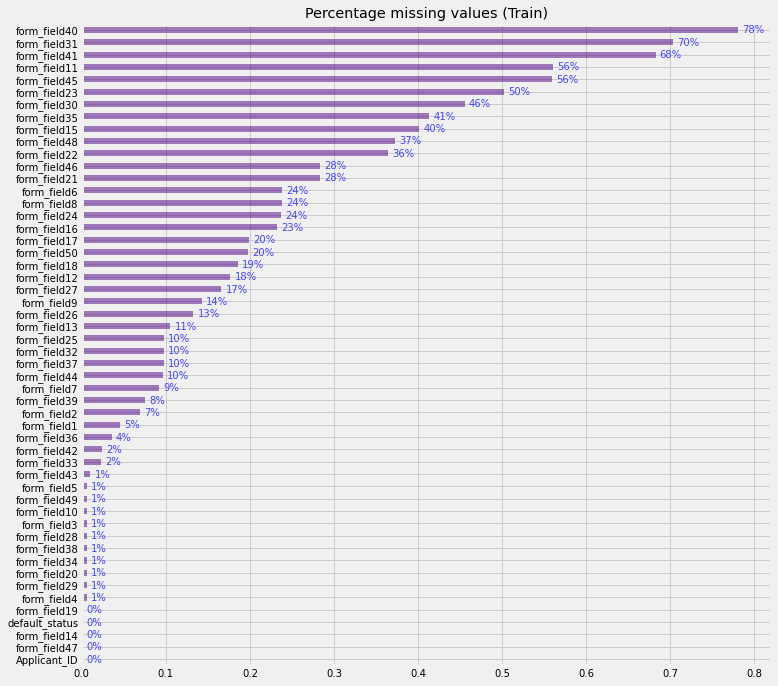

In [14]:
ax = train.isna().sum().transform(lambda x:x/train.shape[0]).sort_values().plot.barh(
    figsize=(11,11), title='Percentage missing values (Train)', color='indigo', alpha=0.5)
for i in ax.patches:
    ax.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(),2)*100))+'%', fontsize=10, color='b', alpha=0.7);

From the Bar chart, there's a lot of missing values in the train data

Lets take a look at the test data

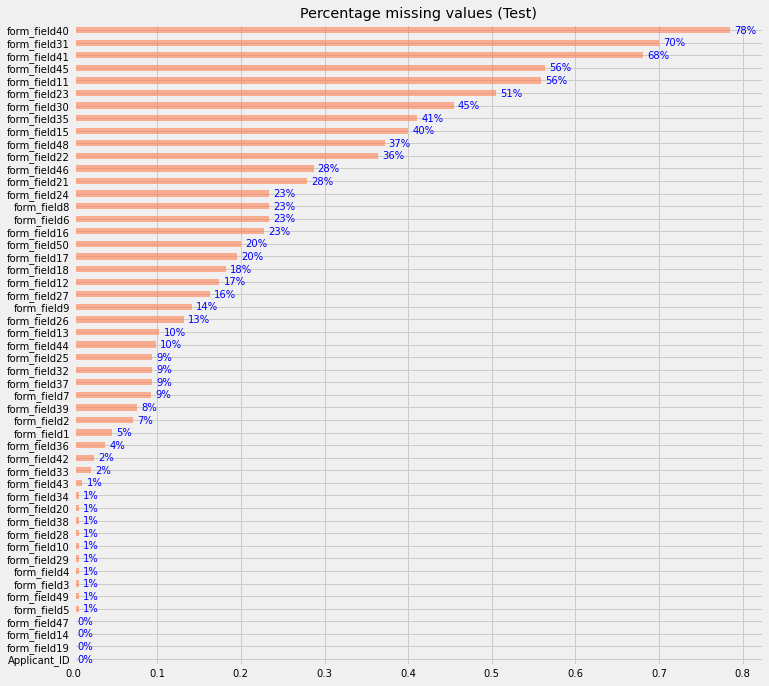

In [15]:
ax1 = test.isna().sum().transform(lambda x:x/test.shape[0]).sort_values().plot.barh(
    figsize=(11,11), title='Percentage missing values (Test)', color='coral', alpha=0.6)
for i in ax1.patches:
    ax1.text(i.get_width()+0.005, i.get_y(), 
             str(int(round(i.get_width(),2)*100))+'%', fontsize=10, color='blue');

Both the train and test data have a lot of missing values. We will see how to handle them.

Form_field40 has the most, with almost 80% missing, followed by form_field31 and then form_field41.

#### Target Distribution

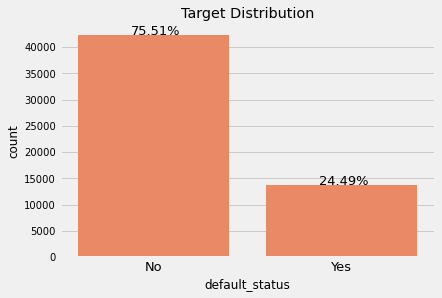

In [16]:
ax = sns.countplot('default_status', data=train,color='coral')
plt.xticks(range(2), ['No', 'Yes'], fontsize=13)
plt.title('Target Distribution')

for i in ax.patches:
    ax.text(i.get_x()+ 0.28, i.get_height()+ 3, 
            str(round(i.get_height()/train.shape[0] * 100,2))+'%', 
            fontsize=13);

As we can see, the data is imbalanced. Hence, we may try to solve the issue of imbalanced datasets. About 74% of the data is for churn No, while 24% for Churn Yes

In [17]:
#Label Encoding target
train.default_status.replace({'no':0, 'yes':1}, inplace=True)

In [18]:
def model_auc(model):
    train_auc = roc_auc_score(ytrain, model.predict_proba(xtrain)[:, 1])
    val_auc = roc_auc_score(yval, model.predict_proba(xval)[:, 1])
    print(f'Train AUC: {train_auc}, Val Auc: {val_auc}')

In [19]:
def plot_figure(model):
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    plot_confusion_matrix(model, xval, yval, ax=ax[0], display_labels=['No', 'Yes'])
    plot_roc_curve(model, xval, yval, ax=ax[1])
    ax[0].set(title='Confusion Matrix')
    ax[1].set(title='ROC Curve')
    ax[0].grid(False)
    ax[1].grid(False)
    ax[1].legend(loc='center right')
    plt.tight_layout(pad=1.0)

#### Filling Missing Values with zeros

In [20]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [21]:
corr= train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

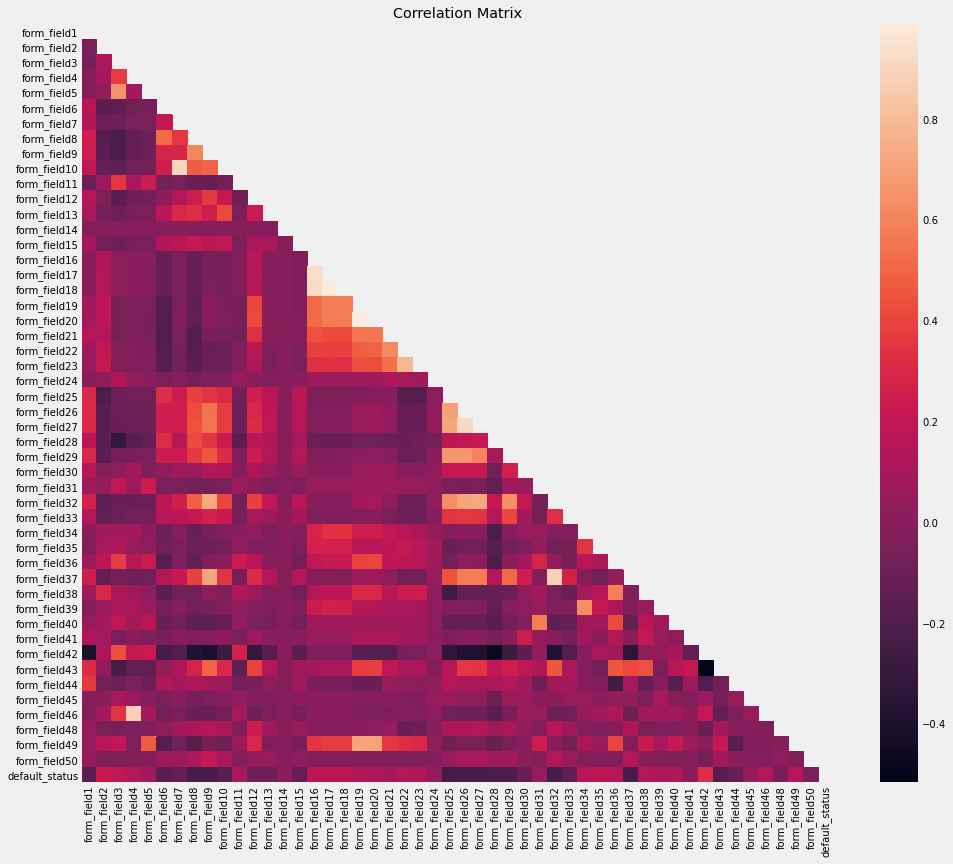

In [22]:
plt.figure(figsize=(15,13))
sns.heatmap(corr, mask=mask)
plt.title('Correlation Matrix');

#### Baseline Model

In [23]:
test_id = test.Applicant_ID

In [24]:
features = train.columns.drop(['Applicant_ID', 'default_status'])
X = pd.get_dummies(train[features])
y = train.default_status
test = pd.get_dummies(test[features])

In [25]:
xtrain, xval, ytrain, yval = train_test_split(X, y, random_state=seed, test_size=0.2, stratify=y)

In [26]:
xtrain.shape, xval.shape

((44800, 51), (11200, 51))

In [27]:
scaler = StandardScaler()

In [28]:
logreg = LogisticRegression(random_state=seed)
logreg_pl = Pipeline([('scaler', scaler), ('logreg', logreg)])

In [29]:
logreg_pl.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=4092))])

In [30]:
model_auc(logreg_pl)

Train AUC: 0.8282510484619692, Val Auc: 0.8254995107026599


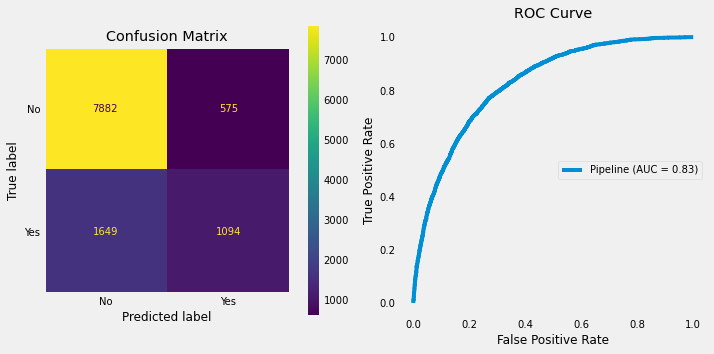

In [31]:
plot_figure(logreg_pl)

In [32]:
print(classification_report(yval, logreg_pl.predict(xval)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      8457
           1       0.66      0.40      0.50      2743

    accuracy                           0.80     11200
   macro avg       0.74      0.67      0.69     11200
weighted avg       0.78      0.80      0.78     11200



#### Submission

In [33]:
test_predictions = logreg_pl.predict_proba(test)[:, 1]

In [34]:
submission = pd.DataFrame({'Applicant_ID' : test_id, 'default_status' : test_predictions})

In [35]:
submission.to_csv(path+'/predictions/Logreg_baseline.csv', index=False)

#### Model Improvement Strategy
1. Try using a non-linear model.
2. Try feature Engineering
3. Try removing redundant features or aggregating them.
4. Try taking a deep look at features with missing values and think of a better way of filling in missing values either with mean, median, mode etc
5. Try to use methods to solve class label imbalance such as class weight or undersampling, oversampling and their hybrid methods. As it is evident from the classification report that the target class has a lower recall.